In [1]:
import requests 
from bs4 import BeautifulSoup as bs
import numpy as np
import pandas as ps
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
import matplotlib.pyplot as mt
import pandas as ps
import numpy as np
import seaborn as sns
import math
import warnings
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
warnings.filterwarnings('ignore') # Hides warning
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore",category=UserWarning)
sns.set_style("whitegrid") # Plotting style
np.random.seed(7) # seeding random number generator
import seaborn as sns

mt.style.use('ggplot')

import nltk

In [16]:
product_name = input("Enter Your product: ")

Enter Your product: iphone


In [17]:
page_url="https://www.flipkart.com/search?q={}".format(product_name)
scrap_pageno=requests.get(page_url).text
page_web=bs(scrap_pageno)

In [18]:
page_web.find_all("div",class_="_2MImiq")[0].find("span").text.split()[3]

'18'

In [19]:
page_url="https://www.flipkart.com/search?q={}".format(product_name)
scrap_pageno=requests.get(page_url).text
page_web=bs(scrap_pageno)
try:
    page_no=int(page_web.find_all("div",class_="_2MImiq")[0].find("span").text.split()[3])
    
except Exception as e:
    a=page_web.find_all("div",class_="_2MImiq")[0].find("span").text.split()[3].split(",")
    page_no=int(a[0]+a[1])

In [20]:
page_no

18

In [21]:
# Pipeline for data fetching from website
import requests
from bs4 import BeautifulSoup as bs

final_links = []
reviews = []
product_title = []

for i in range(1, page_no + 1):
    url = "https://www.flipkart.com/search?q={}&page={}".format(product_name, i)
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 6.3; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/80.0.3987.162 Safari/537.36"
    }
    webpage = requests.get(url, headers=headers).text
    scrap = requests.get(url).text
    web = bs(scrap)
    
    for j in web.find_all("a", class_="_1fQZEK"):
        link = "https://www.flipkart.com" + j.get("href")
        link = link.replace("/p/", "/product-reviews/")
        final_links.append(link)
else:
    for k in final_links:
        product_page = requests.get(k).text
        page_web = bs(product_page)
        test = page_web.find_all("div", class_="_2MImiq _1Qnn1K")
        
        if len(test) > 0:
            try:
                pro_page_no = int(page_web.find_all("div", class_="_2MImiq _1Qnn1K")[0].find("span").text.split()[3])
            except Exception as e:
                pro_ex = page_web.find_all("div", class_="_2MImiq _1Qnn1K")[0].find("span").text.split()[3].split(",")
                pro_page_no = int(pro_ex[0] + pro_ex[1])
        else:
            pro_page_no = 1
        
        for t in range(1):
            scrap = requests.get(k + "&page={}".format(t)).text
            pro_web = bs(scrap)
            
            for l in pro_web.find_all("p", class_="_2-N8zT"):
                reviews.append(l.text)
                try:
                    product_title.append(pro_web.find("div", class_="_2s4DIt _1CDdy2").text)
                except:
                    product_title.append("no name")

In [22]:
pro_web.find("div",class_="_2s4DIt _1CDdy2")

<div class="_2s4DIt _1CDdy2">APPLE iPhone 12 Pro (Pacific Blue, 128 GB) Reviews</div>

In [23]:
# pro_page_no+1

In [24]:
len(reviews)

0

In [25]:
len(product_title)

0

In [104]:
import pandas as ps
fd=ps.DataFrame({"product_title":product_title,"reviews":reviews})
fd.head()

,product_title,reviews
0,Godrej 180 L Direct Cool Single Door 4 Star Re...,Super!
1,Godrej 180 L Direct Cool Single Door 4 Star Re...,Terrific
2,Godrej 180 L Direct Cool Single Door 4 Star Re...,Simply awesome
3,Godrej 180 L Direct Cool Single Door 4 Star Re...,Super!
4,Godrej 180 L Direct Cool Single Door 4 Star Re...,Nice product


In [105]:
fd.to_csv(r"C:\Users\Harshit\Downloads\refrigerators.csv")

In [12]:
fd.to_csv(r"C:\Users\Harshit\Downloads\IFB_.csv")

In [42]:
fd.to_csv(r"C:\Users\Harshit\Downloads\IFB.csv")

In [13]:
fd.to_csv(r"C:\Users\Harshit\Downloads\LG.csv")

In [12]:
fd.to_csv(r"C:\Users\Harshit\Downloads\vu.csv")

In [44]:
fd.to_csv(r"C:\Users\Harshit\Downloads\laptops.csv")

In [33]:
fd.to_csv(r"C:\Users\Harshit\Downloads\jabbaaaa.csv")

In [78]:
fd.to_csv(r"C:\Users\Harshit\Downloads\washing_machines.csv")

In [28]:
fd.to_csv(r"C:\Users\Harshit\Downloads\mi_mobiles.csv")

In [ ]:
fd.to_csv(r"C:\Users\Harshit\Downloads\iphone_1.csv")

In [ ]:
fd.to_csv(r"C:\Users\Harshit\Downloads\oneplusmobile.csv")

In [ ]:
fd.to_csv(r"C:\Users\Harshit\Downloads\iphone.csv")

In [ ]:
fd.to_csv(r"C:\Users\Harshit\Downloads\samsungtv.csv")

In [110]:
ps.set_option("display.max_rows",None)

In [29]:
df=ps.read_csv(r"C:\Users\Harshit\Downloads\washing_machines.csv")
df.head()

,Unnamed: 0,product_title,reviews
0,0,InnoQ 6.5 Kg Semi Automatic Top Load Washing M...,Best in the market!
1,1,InnoQ 6.5 Kg Semi Automatic Top Load Washing M...,Great product
2,2,InnoQ 6.5 Kg Semi Automatic Top Load Washing M...,Super!
3,3,InnoQ 6.5 Kg Semi Automatic Top Load Washing M...,Worth every penny
4,4,InnoQ 6.5 Kg Semi Automatic Top Load Washing M...,Just wow!


In [30]:
df1=ps.read_csv(r"C:\Users\Harshit\Downloads\iphone_1.csv")
df1.head()

,Unnamed: 0,product_title,reviews
0,0,"APPLE iPhone 13 (Starlight, 128 GB) Reviews",Mind-blowing purchase
1,1,"APPLE iPhone 13 (Starlight, 128 GB) Reviews",Very Good
2,2,"APPLE iPhone 13 (Starlight, 128 GB) Reviews",Best in the market!
3,3,"APPLE iPhone 13 (Starlight, 128 GB) Reviews",Excellent
4,4,"APPLE iPhone 13 (Starlight, 128 GB) Reviews",Brilliant


In [31]:
df2=ps.read_csv(r"C:\Users\Harshit\Downloads\mi_mobiles.csv")
df2.head()

,Unnamed: 0,product_title,reviews
0,0,"REDMI 10 Power (Sporty Orange, 128 GB) Reviews",Nice product
1,1,"REDMI 10 Power (Sporty Orange, 128 GB) Reviews",Nice product
2,2,"REDMI 10 Power (Sporty Orange, 128 GB) Reviews",Nice
3,3,"REDMI 10 Power (Sporty Orange, 128 GB) Reviews",Delightful
4,4,"REDMI 10 Power (Sporty Orange, 128 GB) Reviews",Moderate


In [32]:
df3=ps.read_csv(r"C:\Users\Harshit\Downloads\oneplusmobile.csv")
df3.head()

,Unnamed: 0,product_title,reviews
0,0,"OnePlus Nord CE 2 Lite 5G (Blue Tide, 128 GB) ...",Must buy!
1,1,"OnePlus Nord CE 2 Lite 5G (Blue Tide, 128 GB) ...",Delightful
2,2,"OnePlus Nord CE 2 Lite 5G (Blue Tide, 128 GB) ...",Nice product
3,3,"OnePlus Nord CE 2 Lite 5G (Blue Tide, 128 GB) ...",Decent product
4,4,"OnePlus Nord CE 2 Lite 5G (Blue Tide, 128 GB) ...",Nice product


In [33]:
df4=ps.read_csv(r"C:\Users\Harshit\Downloads\iphone.csv")
df4.head()

,Unnamed: 0,product_title,reviews
0,0,"APPLE iPhone 13 (Starlight, 128 GB) Reviews",Perfect product!
1,1,"APPLE iPhone 13 (Starlight, 128 GB) Reviews",Perfect product!
2,2,"APPLE iPhone 13 (Starlight, 128 GB) Reviews",Excellent
3,3,"APPLE iPhone 13 (Starlight, 128 GB) Reviews",Brilliant
4,4,"APPLE iPhone 13 (Starlight, 128 GB) Reviews",Fabulous!


In [34]:
df5=ps.read_csv(r"C:\Users\Harshit\Downloads\samsungtv.csv")
df5.head()

,Unnamed: 0,product_title,reviews
0,0,SAMSUNG Crystal 4K 108 cm (43 inch) Ultra HD (...,Perfect product!
1,1,SAMSUNG Crystal 4K 108 cm (43 inch) Ultra HD (...,Perfect product!
2,2,SAMSUNG Crystal 4K 108 cm (43 inch) Ultra HD (...,Awesome
3,3,SAMSUNG Crystal 4K 108 cm (43 inch) Ultra HD (...,Super!
4,4,SAMSUNG Crystal 4K 108 cm (43 inch) Ultra HD (...,Good quality product


In [35]:
df6=ps.read_csv(r"C:\Users\Harshit\Downloads\jabbaaaa.csv")
df6.head()

,Unnamed: 0,product_title,reviews
0,0,"APPLE iPhone 13 (Midnight, 128 GB) Reviews",Perfect product!
1,1,"APPLE iPhone 13 (Midnight, 128 GB) Reviews",Perfect product!
2,2,"APPLE iPhone 13 (Midnight, 128 GB) Reviews",Brilliant
3,3,"APPLE iPhone 13 (Midnight, 128 GB) Reviews",Excellent
4,4,"APPLE iPhone 13 (Midnight, 128 GB) Reviews",Fabulous!


In [36]:
df7=ps.read_csv(r"C:\Users\Harshit\Downloads\vu.csv")
df7.head(10)

,Unnamed: 0,product_title,reviews
0,0,Vu Premium TV 108 cm (43 inch) Full HD LED Sma...,Simply awesome
1,1,Vu Premium TV 108 cm (43 inch) Full HD LED Sma...,Terrific
2,2,Vu Premium TV 108 cm (43 inch) Full HD LED Sma...,Wonderful
3,3,Vu Premium TV 108 cm (43 inch) Full HD LED Sma...,Highly recommended
4,4,Vu Premium TV 108 cm (43 inch) Full HD LED Sma...,Don't waste your money
5,5,Vu Premium TV 108 cm (43 inch) Full HD LED Sma...,Did not meet expectations
6,6,Vu Premium TV 108 cm (43 inch) Full HD LED Sma...,Really Nice
7,7,Vu Premium TV 108 cm (43 inch) Full HD LED Sma...,Worth every penny
8,8,Vu Premium TV 108 cm (43 inch) Full HD LED Sma...,Wonderful
9,9,Vu Premium TV 108 cm (43 inch) Full HD LED Sma...,Classy product


In [37]:
df8=ps.read_csv(r"C:\Users\Harshit\Downloads\laptops.csv")
df8.head(10)

,Unnamed: 0,product_title,reviews
0,0,Primebook 4G Android Based MediaTek MT8788 - (...,Simply awesome
1,1,Primebook 4G Android Based MediaTek MT8788 - (...,Terrific
2,2,Primebook 4G Android Based MediaTek MT8788 - (...,Awesome
3,3,Primebook 4G Android Based MediaTek MT8788 - (...,Worth every penny
4,4,Primebook 4G Android Based MediaTek MT8788 - (...,Very Good
5,5,Primebook 4G Android Based MediaTek MT8788 - (...,Fabulous!
6,6,Primebook 4G Android Based MediaTek MT8788 - (...,Terrific
7,7,Primebook 4G Android Based MediaTek MT8788 - (...,Super!
8,8,Primebook 4G Android Based MediaTek MT8788 - (...,Must buy!
9,9,Primebook 4G Android Based MediaTek MT8788 - (...,Awesome


In [38]:
df9=ps.read_csv(r"C:\Users\Harshit\Downloads\LG.csv")
df9.head(10)

,Unnamed: 0,product_title,reviews
0,0,LG AI Convertible 6-in-1 Cooling 2023 Model 1....,Pretty good
1,1,LG AI Convertible 6-in-1 Cooling 2023 Model 1....,Perfect product!
2,2,LG AI Convertible 6-in-1 Cooling 2023 Model 1....,Must buy!
3,3,LG AI Convertible 6-in-1 Cooling 2023 Model 1....,Super!
4,4,LG AI Convertible 6-in-1 Cooling 2023 Model 1....,Value-for-money
5,5,LG AI Convertible 6-in-1 Cooling 2023 Model 1....,Classy product
6,6,LG AI Convertible 6-in-1 Cooling 2023 Model 1....,Very Good
7,7,LG AI Convertible 6-in-1 Cooling 2023 Model 1....,Excellent
8,8,LG AI Convertible 6-in-1 Cooling 2023 Model 1....,Super!
9,9,LG AI Convertible 6-in-1 Cooling 2023 Model 1....,Fabulous!


In [39]:
df10=ps.read_csv(r"C:\Users\Harshit\Downloads\IFB.csv")
df10.head(10)

,Unnamed: 0,product_title,reviews
0,0,"IFB 9 kg 2X Power Dual Steam, Hard Water Wash,...",Fabulous!
1,1,"IFB 9 kg 2X Power Dual Steam, Hard Water Wash,...",Must buy!
2,2,"IFB 9 kg 2X Power Dual Steam, Hard Water Wash,...",Nice
3,3,"IFB 9 kg 2X Power Dual Steam, Hard Water Wash,...",Best in the market!
4,4,"IFB 9 kg 2X Power Dual Steam, Hard Water Wash,...",Hated it!
5,5,"IFB 9 kg 2X Power Dual Steam, Hard Water Wash,...",Fabulous!
6,6,"IFB 9 kg 2X Power Dual Steam, Hard Water Wash,...",Fabulous!
7,7,"IFB 9 kg 2X Power Dual Steam, Hard Water Wash,...",Classy product
8,8,"IFB 9 kg 2X Power Dual Steam, Hard Water Wash,...",Fabulous!
9,9,"IFB 9 kg 2X Power Dual Steam, Hard Water Wash,...",Wonderful


In [40]:
df11=ps.read_csv(r"C:\Users\Harshit\Downloads\IFB_.csv")
df11.head(10)

,Unnamed: 0,product_title,reviews
0,0,IFB 8 kg 5 Star 9 Swirl AI Powered with Wi-Fi ...,Delightful
1,1,IFB 8 kg 5 Star 9 Swirl AI Powered with Wi-Fi ...,Best in the market!
2,2,IFB 8 kg 5 Star 9 Swirl AI Powered with Wi-Fi ...,Must buy!
3,3,IFB 8 kg 5 Star 9 Swirl AI Powered with Wi-Fi ...,Great product
4,4,IFB 8 kg 5 Star 9 Swirl AI Powered with Wi-Fi ...,Really Nice
5,5,IFB 8 kg 5 Star 9 Swirl AI Powered with Wi-Fi ...,Mind-blowing purchase
6,6,IFB 8 kg 5 Star 9 Swirl AI Powered with Wi-Fi ...,Awesome
7,7,IFB 8 kg 5 Star 9 Swirl AI Powered with Wi-Fi ...,Mind-blowing purchase
8,8,IFB 8 kg 5 Star 9 Swirl AI Powered with Wi-Fi ...,Great product
9,9,IFB 8 kg 5 Star 9 Swirl AI Powered with Wi-Fi ...,Just wow!


In [41]:
df12=ps.read_csv(r"C:\Users\Harshit\Downloads\refrigerators.csv")
df12.head(10)

,Unnamed: 0,product_title,reviews
0,0,Godrej 180 L Direct Cool Single Door 4 Star Re...,Super!
1,1,Godrej 180 L Direct Cool Single Door 4 Star Re...,Terrific
2,2,Godrej 180 L Direct Cool Single Door 4 Star Re...,Simply awesome
3,3,Godrej 180 L Direct Cool Single Door 4 Star Re...,Super!
4,4,Godrej 180 L Direct Cool Single Door 4 Star Re...,Nice product
5,5,Godrej 180 L Direct Cool Single Door 4 Star Re...,Really Nice
6,6,Godrej 180 L Direct Cool Single Door 4 Star Re...,Wonderful
7,7,Godrej 180 L Direct Cool Single Door 4 Star Re...,Terrific
8,8,Godrej 180 L Direct Cool Single Door 4 Star Re...,Simply awesome
9,9,Godrej 180 L Direct Cool Single Door 4 Star Re...,Must buy!


In [42]:
fd=ps.concat([df, df1, df2, df3, df4,df5,df6,df7,df8,df9,df10,df11,df12],ignore_index=True)
fd.head()

,Unnamed: 0,product_title,reviews
0,0,InnoQ 6.5 Kg Semi Automatic Top Load Washing M...,Best in the market!
1,1,InnoQ 6.5 Kg Semi Automatic Top Load Washing M...,Great product
2,2,InnoQ 6.5 Kg Semi Automatic Top Load Washing M...,Super!
3,3,InnoQ 6.5 Kg Semi Automatic Top Load Washing M...,Worth every penny
4,4,InnoQ 6.5 Kg Semi Automatic Top Load Washing M...,Just wow!


In [43]:
fd.shape

(248192, 3)

In [44]:
fd.reset_index(inplace=True)

In [45]:
fd.head()

,index,Unnamed: 0,product_title,reviews
0,0,0,InnoQ 6.5 Kg Semi Automatic Top Load Washing M...,Best in the market!
1,1,1,InnoQ 6.5 Kg Semi Automatic Top Load Washing M...,Great product
2,2,2,InnoQ 6.5 Kg Semi Automatic Top Load Washing M...,Super!
3,3,3,InnoQ 6.5 Kg Semi Automatic Top Load Washing M...,Worth every penny
4,4,4,InnoQ 6.5 Kg Semi Automatic Top Load Washing M...,Just wow!


In [46]:
fd.shape

(248192, 4)

In [47]:
fd.drop(["Unnamed: 0"],axis=1,inplace=True)

In [48]:
example = fd['reviews'][69]
print(example)

Awesome


In [49]:
fd['reviews']

0            Best in the market!
1                  Great product
2                         Super!
3              Worth every penny
4                      Just wow!
                   ...          
248187      Good quality product
248188    Don't waste your money
248189     Slightly disappointed
248190                 Wonderful
248191              Nice product
Name: reviews, Length: 248192, dtype: object

In [50]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['Awesome']

In [51]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('Awesome', 'NNP')]

In [52]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S (GPE Awesome/NNP))


In [53]:
fd.head()

,index,product_title,reviews
0,0,InnoQ 6.5 Kg Semi Automatic Top Load Washing M...,Best in the market!
1,1,InnoQ 6.5 Kg Semi Automatic Top Load Washing M...,Great product
2,2,InnoQ 6.5 Kg Semi Automatic Top Load Washing M...,Super!
3,3,InnoQ 6.5 Kg Semi Automatic Top Load Washing M...,Worth every penny
4,4,InnoQ 6.5 Kg Semi Automatic Top Load Washing M...,Just wow!


In [54]:
fd.drop(["index"],axis=1,inplace=True)

In [55]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

In [56]:
sia.polarity_scores('I am at my worst!')

{'neg': 0.594, 'neu': 0.406, 'pos': 0.0, 'compound': -0.6588}

In [57]:
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [58]:
sia.polarity_scores(fd.iloc[69]['reviews'])

{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.6249}

In [59]:
fd["reviews"].value_counts()

reviews
Wonderful                                        12879
Must buy!                                         9443
Classy product                                    9249
Great product                                     9207
Fabulous!                                         9199
                                                 ...  
So far so good                                       1
Great phone got it Rs 10400                          1
Excellent phone till date                            1
One of the best smartphones under 15K budget!        1
Worth every penny by NarasaR                         1
Name: count, Length: 2188, dtype: int64

In [60]:
fd.iloc[60]['reviews']

'Brilliant'

In [61]:
fd['scores'] = fd['reviews'].apply(lambda reviews: sia.polarity_scores(reviews) if not isinstance(reviews, float) else None)

fd.head()

,product_title,reviews,scores
0,InnoQ 6.5 Kg Semi Automatic Top Load Washing M...,Best in the market!,"{'neg': 0.0, 'neu': 0.4, 'pos': 0.6, 'compound..."
1,InnoQ 6.5 Kg Semi Automatic Top Load Washing M...,Great product,"{'neg': 0.0, 'neu': 0.196, 'pos': 0.804, 'comp..."
2,InnoQ 6.5 Kg Semi Automatic Top Load Washing M...,Super!,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound..."
3,InnoQ 6.5 Kg Semi Automatic Top Load Washing M...,Worth every penny,"{'neg': 0.0, 'neu': 0.513, 'pos': 0.487, 'comp..."
4,InnoQ 6.5 Kg Semi Automatic Top Load Washing M...,Just wow!,"{'neg': 0.0, 'neu': 0.196, 'pos': 0.804, 'comp..."


In [62]:
fd.shape

(248192, 3)

In [63]:
fd['reviews']=="no name"

0         False
1         False
2         False
3         False
4         False
          ...  
248187    False
248188    False
248189    False
248190    False
248191    False
Name: reviews, Length: 248192, dtype: bool

In [64]:
fd['compound'] = fd['scores'].apply(lambda score_dict: score_dict['compound'] if score_dict is not None else None)
fd.head()

,product_title,reviews,scores,compound
0,InnoQ 6.5 Kg Semi Automatic Top Load Washing M...,Best in the market!,"{'neg': 0.0, 'neu': 0.4, 'pos': 0.6, 'compound...",0.6696
1,InnoQ 6.5 Kg Semi Automatic Top Load Washing M...,Great product,"{'neg': 0.0, 'neu': 0.196, 'pos': 0.804, 'comp...",0.6249
2,InnoQ 6.5 Kg Semi Automatic Top Load Washing M...,Super!,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.6360
3,InnoQ 6.5 Kg Semi Automatic Top Load Washing M...,Worth every penny,"{'neg': 0.0, 'neu': 0.513, 'pos': 0.487, 'comp...",0.2263
4,InnoQ 6.5 Kg Semi Automatic Top Load Washing M...,Just wow!,"{'neg': 0.0, 'neu': 0.196, 'pos': 0.804, 'comp...",0.6239


In [65]:
fd['comp_score'] = fd['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')

fd.head(10)

,product_title,reviews,scores,compound,comp_score
0,InnoQ 6.5 Kg Semi Automatic Top Load Washing M...,Best in the market!,"{'neg': 0.0, 'neu': 0.4, 'pos': 0.6, 'compound...",0.6696,pos
1,InnoQ 6.5 Kg Semi Automatic Top Load Washing M...,Great product,"{'neg': 0.0, 'neu': 0.196, 'pos': 0.804, 'comp...",0.6249,pos
2,InnoQ 6.5 Kg Semi Automatic Top Load Washing M...,Super!,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.6360,pos
3,InnoQ 6.5 Kg Semi Automatic Top Load Washing M...,Worth every penny,"{'neg': 0.0, 'neu': 0.513, 'pos': 0.487, 'comp...",0.2263,pos
4,InnoQ 6.5 Kg Semi Automatic Top Load Washing M...,Just wow!,"{'neg': 0.0, 'neu': 0.196, 'pos': 0.804, 'comp...",0.6239,pos
5,InnoQ 6.5 Kg Semi Automatic Top Load Washing M...,Super!,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.6360,pos
6,InnoQ 6.5 Kg Semi Automatic Top Load Washing M...,Awesome,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.6249,pos
7,InnoQ 6.5 Kg Semi Automatic Top Load Washing M...,Mind-blowing purchase,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos
8,InnoQ 6.5 Kg Semi Automatic Top Load Washing M...,Great product,"{'neg': 0.0, 'neu': 0.196, 'pos': 0.804, 'comp...",0.6249,pos
9,no name,Perfect product!,"{'neg': 0.0, 'neu': 0.2, 'pos': 0.8, 'compound...",0.6114,pos


In [66]:
fd.comp_score.value_counts()

comp_score
pos    231588
neg     16604
Name: count, dtype: int64

In [67]:
16604/231588
# we can see that barely see that it is the matter of data imbalance

0.07169628823600532

In [68]:
fd.head()

,product_title,reviews,scores,compound,comp_score
0,InnoQ 6.5 Kg Semi Automatic Top Load Washing M...,Best in the market!,"{'neg': 0.0, 'neu': 0.4, 'pos': 0.6, 'compound...",0.6696,pos
1,InnoQ 6.5 Kg Semi Automatic Top Load Washing M...,Great product,"{'neg': 0.0, 'neu': 0.196, 'pos': 0.804, 'comp...",0.6249,pos
2,InnoQ 6.5 Kg Semi Automatic Top Load Washing M...,Super!,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.6360,pos
3,InnoQ 6.5 Kg Semi Automatic Top Load Washing M...,Worth every penny,"{'neg': 0.0, 'neu': 0.513, 'pos': 0.487, 'comp...",0.2263,pos
4,InnoQ 6.5 Kg Semi Automatic Top Load Washing M...,Just wow!,"{'neg': 0.0, 'neu': 0.196, 'pos': 0.804, 'comp...",0.6239,pos


In [69]:
fd.isnull().sum()/len(fd)*100

product_title    0.000000
reviews          0.002417
scores           0.002417
compound         0.002417
comp_score       0.000000
dtype: float64

In [70]:
fd.dropna(subset=['reviews', 'scores', 'compound'], inplace=True)

In [71]:
fd.describe()

,compound
count,248186.000000
mean,0.379384
std,0.317191
min,-0.863300
25%,0.226300
50%,0.476700
75%,0.611400
max,0.949100


In [72]:
fd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 248186 entries, 0 to 248191
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   product_title  248186 non-null  object 
 1   reviews        248186 non-null  object 
 2   scores         248186 non-null  object 
 3   compound       248186 non-null  float64
 4   comp_score     248186 non-null  object 
dtypes: float64(1), object(4)
memory usage: 11.4+ MB


In [73]:
fd.groupby('comp_score').describe()

compound                                                      \
               count      mean       std     min     25%     50%     75%   
comp_score                                                                 
neg          16598.0 -0.479702  0.138713 -0.8633 -0.5423 -0.4767 -0.4228   
pos         231588.0  0.440955  0.223060  0.0000  0.2716  0.4927  0.6239   

                    
               max  
comp_score          
neg        -0.0127  
pos         0.9491

In [74]:
# Now we are managing our data to make it balance
fd_neg = fd[fd['comp_score']=='neg']
fd_neg.shape

(16598, 5)

In [75]:
fd_pos = fd[fd['comp_score']=='pos']
fd_pos.shape

(231588, 5)

In [76]:
fd_pos_downsampled = fd_pos.sample(fd_neg.shape[0])
fd_pos_downsampled.shape

(16598, 5)

In [77]:
fd_balanced = ps.concat([fd_pos_downsampled, fd_neg])
fd_balanced.shape

(33196, 5)

In [78]:
# Now we have balanced data through which we are not going to have any overfitting problem
fd_balanced['comp_score'].value_counts()

comp_score
pos    16598
neg    16598
Name: count, dtype: int64

In [79]:
fd_balanced['neg']=fd_balanced['comp_score'].apply(lambda x: 1 if x=='neg' else 0)
fd_balanced.sample(10)

,product_title,reviews,scores,compound,comp_score,neg
130966,Thomson FA Series 80 cm (32 inch) HD Ready LED...,Fabulous!,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.5707,pos,0
51142,"Redmi Y2 (Blue, 32 GB) Reviews",Highly recommended,"{'neg': 0.0, 'neu': 0.323, 'pos': 0.677, 'comp...",0.2716,pos,0
220186,SAMSUNG 236 L Frost Free Double Door 2 Star Re...,Worthless,"{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound...",-0.4404,neg,1
162903,IFB Neptune VX Free Standing 12 Place Settings...,Worst experience ever!,"{'neg': 0.687, 'neu': 0.313, 'pos': 0.0, 'comp...",-0.6588,neg,1
186723,"IFB 6 kg Steam Wash, Hard Water Wash, Active C...",Excellent,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.5719,pos,0
181127,IFB Descaling Detergent Powder for washing mac...,Worth the money,"{'neg': 0.0, 'neu': 0.513, 'pos': 0.487, 'comp...",0.2263,pos,0
193715,"IFB 7 kg 5 Star 2X Power Steam,Hard Water Wash...",Highly recommended,"{'neg': 0.0, 'neu': 0.323, 'pos': 0.677, 'comp...",0.2716,pos,0
195212,"IFB 6 kg Steam Wash, Hard Water Wash, Active C...",Hated it!,"{'neg': 0.818, 'neu': 0.182, 'pos': 0.0, 'comp...",-0.6696,neg,1
92525,"Apple iPhone XR (White, 128 GB) (Includes EarP...",Super!,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.6360,pos,0
63443,"Redmi Note 9 Pro (Aurora Blue, 128 GB) Reviews",Worst experience ever!,"{'neg': 0.687, 'neu': 0.313, 'pos': 0.0, 'comp...",-0.6588,neg,1


In [80]:
fd_balanced.shape

(33196, 6)

In [81]:
ps.set_option('display.max_colwidth', None)

In [113]:
# Print the DataFrame with full product names
print(fd_balanced['product_title'].head())

0                                                                                                                                         Redmi Note 7S (Onyx Black, 64 GB) Reviews
1                                                     IFB 7 kg 5 Star 2X Power Steam, Hard Water Wash Fully Automatic Front Load Washing Machine with In-built Heater Brown Reviews
2                                                                                                      SAMSUNG Crystal 4K 108 cm (43 inch) Ultra HD (4K) LED Smart Tizen TV Reviews
3                                                                                                                                       APPLE iPhone 13 mini (Blue, 256 GB) Reviews
4    IFB 8 kg 5 Star 9 Swirl AI Powered with Wi-Fi 4 years Comprehensive Warranty with 2x Power Steam Fully Automatic Front Load Washing Machine with In-built Heater Brown Reviews
Name: product_title, dtype: object


In [83]:
fd_balanced.product_title

66508                                                                                                                                          Redmi Note 7S (Onyx Black, 64 GB) Reviews
215468                                                     IFB 7 kg 5 Star 2X Power Steam, Hard Water Wash Fully Automatic Front Load Washing Machine with In-built Heater Brown Reviews
100169                                                                                                      SAMSUNG Crystal 4K 108 cm (43 inch) Ultra HD (4K) LED Smart Tizen TV Reviews
28483                                                                                                                                        APPLE iPhone 13 mini (Blue, 256 GB) Reviews
204241    IFB 8 kg 5 Star 9 Swirl AI Powered with Wi-Fi 4 years Comprehensive Warranty with 2x Power Steam Fully Automatic Front Load Washing Machine with In-built Heater Brown Reviews
                                                                           

In [84]:
# Recommendation System
def get_similar_products(product_title, n):
    # Create TF-IDF matrix
    tfidf = TfidfVectorizer(stop_words='english')
    tfidf_matrix = tfidf.fit_transform(fd_balanced['reviews'])

    # Compute the cosine similarity matrix
    cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

    # Reset the index of fd_balanced
    fd_balanced.reset_index(drop=True, inplace=True)

    # Get the index of the product
    indices = ps.Series(fd_balanced.index, index=fd_balanced['product_title']).drop_duplicates()
    idx = indices[product_title]

    # Compute the pairwise similarity scores
    scores = list(enumerate(cosine_sim[idx]))

    # Sort the products based on similarity scores
    scores = sorted(scores, key=lambda x: x[1][0], reverse=True)  # Modify the sorting logic here

    # Get the top n similar products (excluding itself)
    top_scores = scores[1:n + 1]

    # Get the product indices
    product_indices = [score[0] for score in top_scores]

    # Return the top n similar products
    return fd_balanced['product_title'].iloc[product_indices]


In [116]:
product = "         Godrej 294 L Frost Free Double Door 2 Star Refrigerator Reviews".strip()
num_recommendations = 5
recommendations = get_similar_products(product, num_recommendations)
print(f"Top {num_recommendations} recommended products for '{product}':")
print(recommendations)

Top 5 recommended products for 'Godrej 294 L Frost Free Double Door 2 Star Refrigerator Reviews':
1                                                     IFB 7 kg 5 Star 2X Power Steam, Hard Water Wash Fully Automatic Front Load Washing Machine with In-built Heater Brown Reviews
2                                                                                                      SAMSUNG Crystal 4K 108 cm (43 inch) Ultra HD (4K) LED Smart Tizen TV Reviews
3                                                                                                                                       APPLE iPhone 13 mini (Blue, 256 GB) Reviews
4    IFB 8 kg 5 Star 9 Swirl AI Powered with Wi-Fi 4 years Comprehensive Warranty with 2x Power Steam Fully Automatic Front Load Washing Machine with In-built Heater Brown Reviews
5                                                                                                                                    APPLE iPhone 13 ((PRODUCT)RED, 256 GB) Reviews
Na

In [88]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(fd_balanced['reviews'],fd_balanced['neg'], stratify=fd_balanced['neg'])

In [89]:
X_train.head(4)

29525       Horrible
9668       Just wow!
20917    Bad quality
5             Super!
Name: reviews, dtype: object

In [90]:
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

In [91]:
def get_sentence_embeding(sentences):
    preprocessed_text = bert_preprocess(sentences)
    return bert_encoder(preprocessed_text)['pooled_output']

get_sentence_embeding([
    "500$ discount. hurry up", 
    "Odin, are you there?",
    "I will meet you in Valhalla, will drink ale",
    "Why always me, God"]
)

<tf.Tensor: shape=(4, 768), dtype=float32, numpy=
array([[-0.8435169 , -0.5132726 , -0.88845724, ..., -0.74748874,
        -0.7531473 ,  0.9196449 ],
       [-0.9241627 , -0.29388258, -0.9712885 , ..., -0.9276766 ,
        -0.6102464 ,  0.90782315],
       [-0.8739092 , -0.43364036, -0.85776633, ..., -0.7138211 ,
        -0.7192733 ,  0.9243591 ],
       [-0.8730835 , -0.2893696 , -0.35944772, ...,  0.08192193,
        -0.69178367,  0.9021187 ]], dtype=float32)>

In [92]:
e = get_sentence_embeding([
    "banana", 
    "grapes",
    "mango",
    "gautam adani",
    "elon musk",
    "Bill gates",
    "Narendra modi",
    "yogi adityanath",
    "Jai Shree Ram"
]
)

In [93]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity([e[0]],[e[1]])

array([[0.9911088]], dtype=float32)

In [94]:
cosine_similarity([e[0]],[e[3]])

array([[0.921638]], dtype=float32)

In [95]:
# Bert layers
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)

# Neural network layers
l = tf.keras.layers.Dropout(0.1, name="dropout")(outputs['pooled_output'])
l = tf.keras.layers.Dense(1, activation='sigmoid', name="output")(l)

# Use inputs and outputs to construct a final model
model = tf.keras.Model(inputs=[text_input], outputs = [l])

In [96]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer (KerasLayer)       {'input_word_ids':   0           ['text[0][0]']                   
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128),                                                          
                                 'input_type_ids':                                                
                                (None, 128)}                                                  

In [97]:
len(X_train)

24897

In [98]:
len(y_train)

24897

In [99]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')
]

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=METRICS)

In [101]:
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

In [102]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
779/779 [==============================] - 3151s 4s/step - loss: 0.4656 - accuracy: 0.8461 - precision: 0.8375 - recall: 0.8589
Epoch 2/10
779/779 [==============================] - 3055s 4s/step - loss: 0.2634 - accuracy: 0.9576 - precision: 0.9458 - recall: 0.9708
Epoch 3/10
779/779 [==============================] - 2987s 4s/step - loss: 0.1965 - accuracy: 0.9661 - precision: 0.9560 - recall: 0.9771
Epoch 4/10
779/779 [==============================] - 2890s 4s/step - loss: 0.1597 - accuracy: 0.9694 - precision: 0.9609 - recall: 0.9785
Epoch 5/10
779/779 [==============================] - 2914s 4s/step - loss: 0.1373 - accuracy: 0.9728 - precision: 0.9653 - recall: 0.9809
Epoch 6/10
779/779 [==============================] - 3002s 4s/step - loss: 0.1252 - accuracy: 0.9726 - precision: 0.9654 - recall: 0.9804
Epoch 7/10
779/779 [==============================] - 2889s 4s/step - loss: 0.1133 - accuracy: 0.9749 - precision: 0.9684 - recall: 0.9818
Epoch 8/10
779/779 [=======

In [103]:
X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

model.evaluate(X_test, y_test)

260/260 [==============================] - 1028s 4s/step - loss: 0.0680 - accuracy: 0.9855 - precision: 0.9841 - recall: 0.9870


[0.06800997257232666,
 0.9855404496192932,
 0.9841384291648865,
 0.9869847893714905]

In [104]:
y_predicted = model.predict(X_test)
y_predicted = y_predicted.flatten()

260/260 [==============================] - 1083s 4s/step


In [105]:
import numpy as np

y_predicted = np.where(y_predicted > 0.5, 1, 0)
y_predicted

array([0, 0, 0, ..., 1, 1, 1])

In [106]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_predicted)
cm 

array([[4084,   66],
       [  54, 4095]], dtype=int64)

Text(50.722222222222214, 0.5, 'Truth')

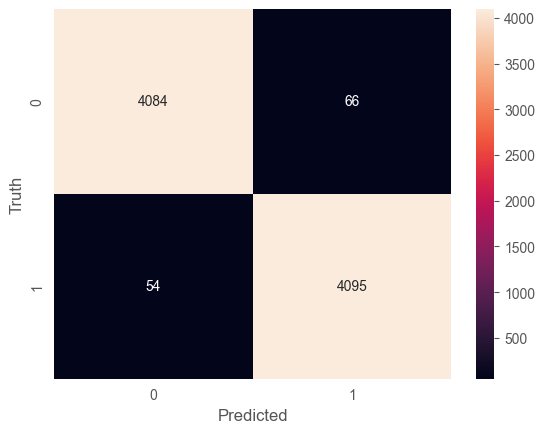

In [107]:
sns.heatmap(cm, annot=True, fmt='d')
mt.xlabel('Predicted')
mt.ylabel('Truth')

In [108]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      4150
           1       0.98      0.99      0.99      4149

    accuracy                           0.99      8299
   macro avg       0.99      0.99      0.99      8299
weighted avg       0.99      0.99      0.99      8299



In [110]:
reviews = [
    "Utterly Disappointed",
    "Worst Product i have ever seen",
    "Worth Purchase",
    "Super!",
    "Making shopping feel like a punishment.",
    "Where your orders go to vanish into thin air",
    "Excellent quality and durability, worth every penny!",
    "Sleek design and leak-proof, perfect for on-the-go hydration.",
    "Lightweight and compact, fits perfectly in my bag or backpack.",
    "Shut up just say jai shree ram",
    "This is the worst i have seen"
    "Marvellous Product",
    "Best Purchase ever",
    "Worth every penny"
]
model.predict(reviews)

1/1 [==============================] - 1s 1s/step


array([[9.7287816e-01],
       [9.9899715e-01],
       [4.4444096e-01],
       [7.6854491e-04],
       [2.9215020e-01],
       [9.0646040e-01],
       [2.2552140e-02],
       [3.2157644e-03],
       [1.1962293e-02],
       [1.8234545e-01],
       [9.8908216e-01],
       [1.4000921e-02],
       [3.7055880e-02]], dtype=float32)